In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
!pip3 install plotly xlrd psutil requests orca

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import pandas as pd 

import plotly.express as px

df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls")
df = df.set_index(["DateRep", "Countries and territories"])
df = df.sort_values(by = "DateRep", axis = 'index')
df['deathcumsum'] = df.groupby(level=-1)['Deaths'].cumsum()
df['casescumsum'] = df.groupby(level=-1)['Cases'].cumsum()
df["mortality"] = df["deathcumsum"] / df["casescumsum"]


# cases = df.groupby("Countries and territories").agg({"Deaths" : "sum", "Cases" : "sum"})
# cases["mortality"] = round(cases["Deaths"] / cases["Cases"] * 100, 2)
# cases.sort_values("Cases", inplace = True, ascending = False)
# cases["country"] = cases.index
# print(cases)

# fig = px.scatter(cases, x="Cases", y="Deaths", color="country", log_x = True, log_y = True)
#         # , marginal_y="violin", marginal_x="box", trendline="ols")
# fig.show()

df = df.reset_index()
print(df)

        DateRep Countries and territories  Day  Month  Year  Cases  Deaths  \
0    2019-12-31                   Vietnam   31     12  2019      0       0   
1    2019-12-31                  Pakistan   31     12  2019      0       0   
2    2019-12-31                    Greece   31     12  2019      0       0   
3    2019-12-31               Philippines   31     12  2019      0       0   
4    2019-12-31                   Germany   31     12  2019      0       0   
...         ...                       ...  ...    ...   ...    ...     ...   
5524 2020-03-18                 Lithuania   18      3  2020      8       0   
5525 2020-03-18             Liechtenstein   18      3  2020      0       0   
5526 2020-03-18                   Liberia   18      3  2020      1       0   
5527 2020-03-18                    Mexico   18      3  2020     11       0   
5528 2020-03-18               Afghanistan   18      3  2020      1       0   

     GeoId  deathcumsum  casescumsum  mortality  
0       VN   

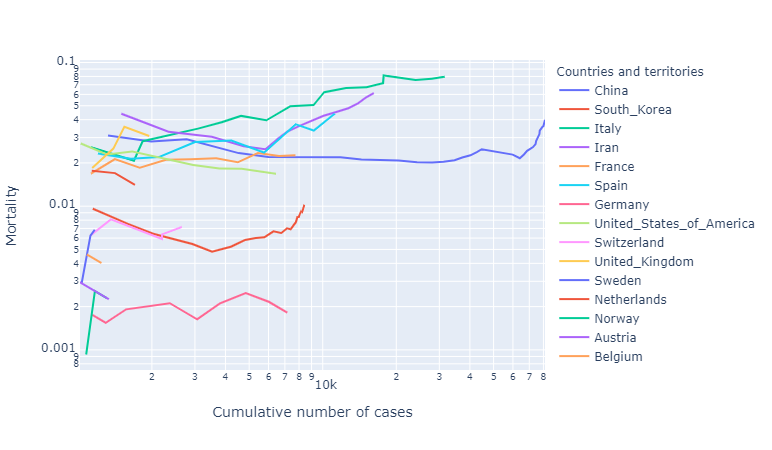

In [21]:
fig = px.line(df[df["casescumsum"] > 1000], 
              x="casescumsum", 
              y="mortality", 
              color="Countries and territories", 
              line_group="Countries and territories", 
              hover_name="Countries and territories",
#               text="Countries and territories",
              log_x = True,
              log_y = True
        ) #line_shape="spline") #, render_mode="svg")

fig.update_xaxes(title_text='Cumulative number of cases')
fig.update_yaxes(title_text='Mortality')
# fig.write_image("fig1.html")
fig.show()